In [1]:
#ipython notebook --python=inline

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import random
from datetime import datetime
plt.rcParams.update({'font.size': 24}) 

In [2]:
## to know where the matplotlib file is
import matplotlib
matplotlib.matplotlib_fname()

'/home/pooja/.local/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

In [3]:
#colnames=['sampletime', 'timeofmeasurement', 'samplingrate', 'channelname','min','max','avg','skewness','sd','kurtosis','peak_magnitude','peak_frequency'] 
df = pd.read_excel("/home/pooja/Documents/hh-housing/health/Bluttest.xlsx") 

In [4]:
df.head()

,Date,TSH1 (muIU/mg),TSH Stimuliert,FERR,Unnamed: 4,TSH,Leukozyten (/nl),Erythrozyten (/pl),Hamoglobin (g/dl),Hamotokrit,...,DHEAS,ANDRO,Progestron,FSH,LH,Vitamin-H,Zink in Serum,Cholesterol (mg/dl),Calcium,Hairfall
0,29.05.2017,NaN,NaN,NaN,NaN,NaN,9.6,4.00,12.9,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,27.10.2014,6.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,27.05.2016,1.80,NaN,136.2,NaN,NaN,4.2,4.37,13.9,38.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,27.03.2018,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,24.07.2014,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [5]:
df.shape

(38, 38)

In [6]:
df.dtypes

Date                    object
TSH1 (muIU/mg)         float64
TSH Stimuliert         float64
FERR                   float64
Unnamed: 4             float64
TSH                    float64
Leukozyten (/nl)       float64
Erythrozyten (/pl)     float64
Hamoglobin (g/dl)      float64
Hamotokrit             float64
MCV (fl)               float64
MCH (pg)               float64
MCHC (g/dl)            float64
Thermbozyten (/nl)     float64
Neutrophile            float64
Lymphozyten            float64
Monozyten              float64
Eosinophile            float64
Basophile              float64
C-reactive Protein     float64
25-Hydroxy-VitD        float64
HbA1C                  float64
Glucose nuctern        float64
FT3                    float64
FT4                    float64
Testo                  float64
FAI                    float64
DIHY                   float64
DHEAS                  float64
ANDRO                  float64
Progestron             float64
FSH                    float64
LH      

# Preprocessing

In [7]:
## Lets change the date-month-year format
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

In [8]:
df.describe()

,TSH1 (muIU/mg),TSH Stimuliert,FERR,Unnamed: 4,TSH,Leukozyten (/nl),Erythrozyten (/pl),Hamoglobin (g/dl),Hamotokrit,MCV (fl),...,DHEAS,ANDRO,Progestron,FSH,LH,Vitamin-H,Zink in Serum,Cholesterol (mg/dl),Calcium,Hairfall
count,31.000000,1.00,10.000000,0.0,0.0,12.000000,11.000000,12.000000,12.000000,11.000000,...,3.00000,1.0,3.000000,1.0,1.0,1.0,2.000000,3.000000,1.00,37.000000
mean,1.994194,5.03,80.550000,NaN,NaN,6.241667,4.373636,13.883333,39.808333,90.972727,...,175.40000,1.4,0.180000,10.2,8.3,600.0,86.200000,159.666667,2.25,0.108108
std,2.255507,NaN,50.126955,NaN,NaN,1.387908,0.151412,0.468718,1.595709,1.286150,...,42.90606,NaN,0.174356,NaN,NaN,NaN,23.758788,12.858201,NaN,0.314800
min,0.130000,5.03,22.400000,NaN,NaN,4.200000,4.000000,12.900000,36.000000,88.600000,...,146.50000,1.4,0.060000,10.2,8.3,600.0,69.400000,145.000000,2.25,0.000000
25%,0.710000,5.03,38.875000,NaN,NaN,5.600000,4.330000,13.700000,39.000000,90.000000,...,150.75000,1.4,0.080000,10.2,8.3,600.0,77.800000,155.000000,2.25,0.000000
50%,1.140000,5.03,73.250000,NaN,NaN,6.150000,4.370000,13.850000,39.900000,91.000000,...,155.00000,1.4,0.100000,10.2,8.3,600.0,86.200000,165.000000,2.25,0.000000
75%,2.685000,5.03,120.350000,NaN,NaN,6.750000,4.440000,14.250000,41.000000,91.800000,...,189.85000,1.4,0.240000,10.2,8.3,600.0,94.600000,167.000000,2.25,0.000000
max,10.210000,5.03,158.300000,NaN,NaN,9.600000,4.560000,14.500000,42.000000,92.800000,...,224.70000,1.4,0.380000,10.2,8.3,600.0,103.000000,169.000000,2.25,1.000000


In [9]:
df.columns

Index(['Date', 'TSH1 (muIU/mg)', 'TSH Stimuliert', 'FERR', 'Unnamed: 4', 'TSH',
       'Leukozyten (/nl)', 'Erythrozyten (/pl)', 'Hamoglobin (g/dl)',
       'Hamotokrit', 'MCV (fl)', 'MCH (pg)', 'MCHC (g/dl)',
       'Thermbozyten (/nl)', 'Neutrophile', 'Lymphozyten', 'Monozyten',
       'Eosinophile', 'Basophile', 'C-reactive Protein', '25-Hydroxy-VitD',
       'HbA1C', 'Glucose nuctern', 'FT3', 'FT4', 'Testo', 'FAI', 'DIHY',
       'DHEAS', 'ANDRO', 'Progestron', 'FSH', 'LH', 'Vitamin-H',
       'Zink in Serum', 'Cholesterol (mg/dl)', 'Calcium', 'Hairfall'],
      dtype='object')

In [10]:
df.shape

(38, 38)

In [11]:
df= df.drop(['Unnamed: 4'], axis=1)
df.shape

(38, 37)

In [12]:
colnames = ["Date","TSH1 (muIU/mg)","TSH Stimuliert","FERR (ng/ml)","TSH","Leukozyten (c/nl)","Erythrozyten (c/pl)","Hamoglobin (g/dl)","Hamotokrit (Vol%)","MCV (fl)","MCH (pg)","MCHC (g/dl)","Thermbozyten (c/nl)", "Neutrophile", "Lymphozyten", "Monozyten", "Eosinophile", "Basophile","C-reactive Protein","25-Hydroxy-VitD", "HbA1C","Glucose nuctern","FT3 (ng/l)","FT4 (ng/dl)","Testosteron (ng/ml)","Frier Androgen Index","DIHY","DHEAS","ANDRO","Progestron (ng/ml)","FSH (mlE/ml)","LH (mlE/ml)","Vitamin-H (ng/dl)","Zink (mug/dl)","Cholesterol (mg/dl)","Calcium (mmol/l)","Hairfall"]

In [13]:
df.head()

,Date,TSH1 (muIU/mg),TSH Stimuliert,FERR,TSH,Leukozyten (/nl),Erythrozyten (/pl),Hamoglobin (g/dl),Hamotokrit,MCV (fl),...,DHEAS,ANDRO,Progestron,FSH,LH,Vitamin-H,Zink in Serum,Cholesterol (mg/dl),Calcium,Hairfall
0,2017-05-29,NaN,NaN,NaN,NaN,9.6,4.00,12.9,36.0,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2014-10-27,6.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2016-05-27,1.80,NaN,136.2,NaN,4.2,4.37,13.9,38.7,88.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2018-03-27,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2014-07-24,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [14]:
df.columns = colnames

In [15]:
df=df.drop(["TSH"], axis=1)

In [16]:
df.shape

(38, 36)

### change NA's to 0

In [18]:
#df = df.fillna(0)

In [19]:
## LEts find the header for the new dataset
#header=list(df.head(0)) 
#print(header)

In [20]:
df.describe()

,TSH1 (muIU/mg),TSH Stimuliert,FERR (ng/ml),Leukozyten (c/nl),Erythrozyten (c/pl),Hamoglobin (g/dl),Hamotokrit (Vol%),MCV (fl),MCH (pg),MCHC (g/dl),...,DHEAS,ANDRO,Progestron (ng/ml),FSH (mlE/ml),LH (mlE/ml),Vitamin-H (ng/dl),Zink (mug/dl),Cholesterol (mg/dl),Calcium (mmol/l),Hairfall
count,30.000000,1.00,10.000000,12.000000,11.000000,12.000000,12.000000,11.000000,11.000000,11.000000,...,3.00000,1.0,3.000000,1.0,1.0,1.0,2.000000,3.000000,1.00,37.000000
mean,1.966000,5.03,80.550000,6.241667,4.373636,13.883333,39.808333,90.972727,31.763636,34.936364,...,175.40000,1.4,0.180000,10.2,8.3,600.0,86.200000,159.666667,2.25,0.108108
std,2.288503,NaN,50.126955,1.387908,0.151412,0.468718,1.595709,1.286150,0.467488,0.677160,...,42.90606,NaN,0.174356,NaN,NaN,NaN,23.758788,12.858201,NaN,0.314800
min,0.130000,5.03,22.400000,4.200000,4.000000,12.900000,36.000000,88.600000,30.900000,33.800000,...,146.50000,1.4,0.060000,10.2,8.3,600.0,69.400000,145.000000,2.25,0.000000
25%,0.690000,5.03,38.875000,5.600000,4.330000,13.700000,39.000000,90.000000,31.550000,34.350000,...,150.75000,1.4,0.080000,10.2,8.3,600.0,77.800000,155.000000,2.25,0.000000
50%,1.110000,5.03,73.250000,6.150000,4.370000,13.850000,39.900000,91.000000,31.800000,35.100000,...,155.00000,1.4,0.100000,10.2,8.3,600.0,86.200000,165.000000,2.25,0.000000
75%,2.432500,5.03,120.350000,6.750000,4.440000,14.250000,41.000000,91.800000,32.000000,35.400000,...,189.85000,1.4,0.240000,10.2,8.3,600.0,94.600000,167.000000,2.25,0.000000
max,10.210000,5.03,158.300000,9.600000,4.560000,14.500000,42.000000,92.800000,32.700000,35.900000,...,224.70000,1.4,0.380000,10.2,8.3,600.0,103.000000,169.000000,2.25,1.000000


## Distribution analysis

In [17]:
df=df.sort_values(by='Date') 

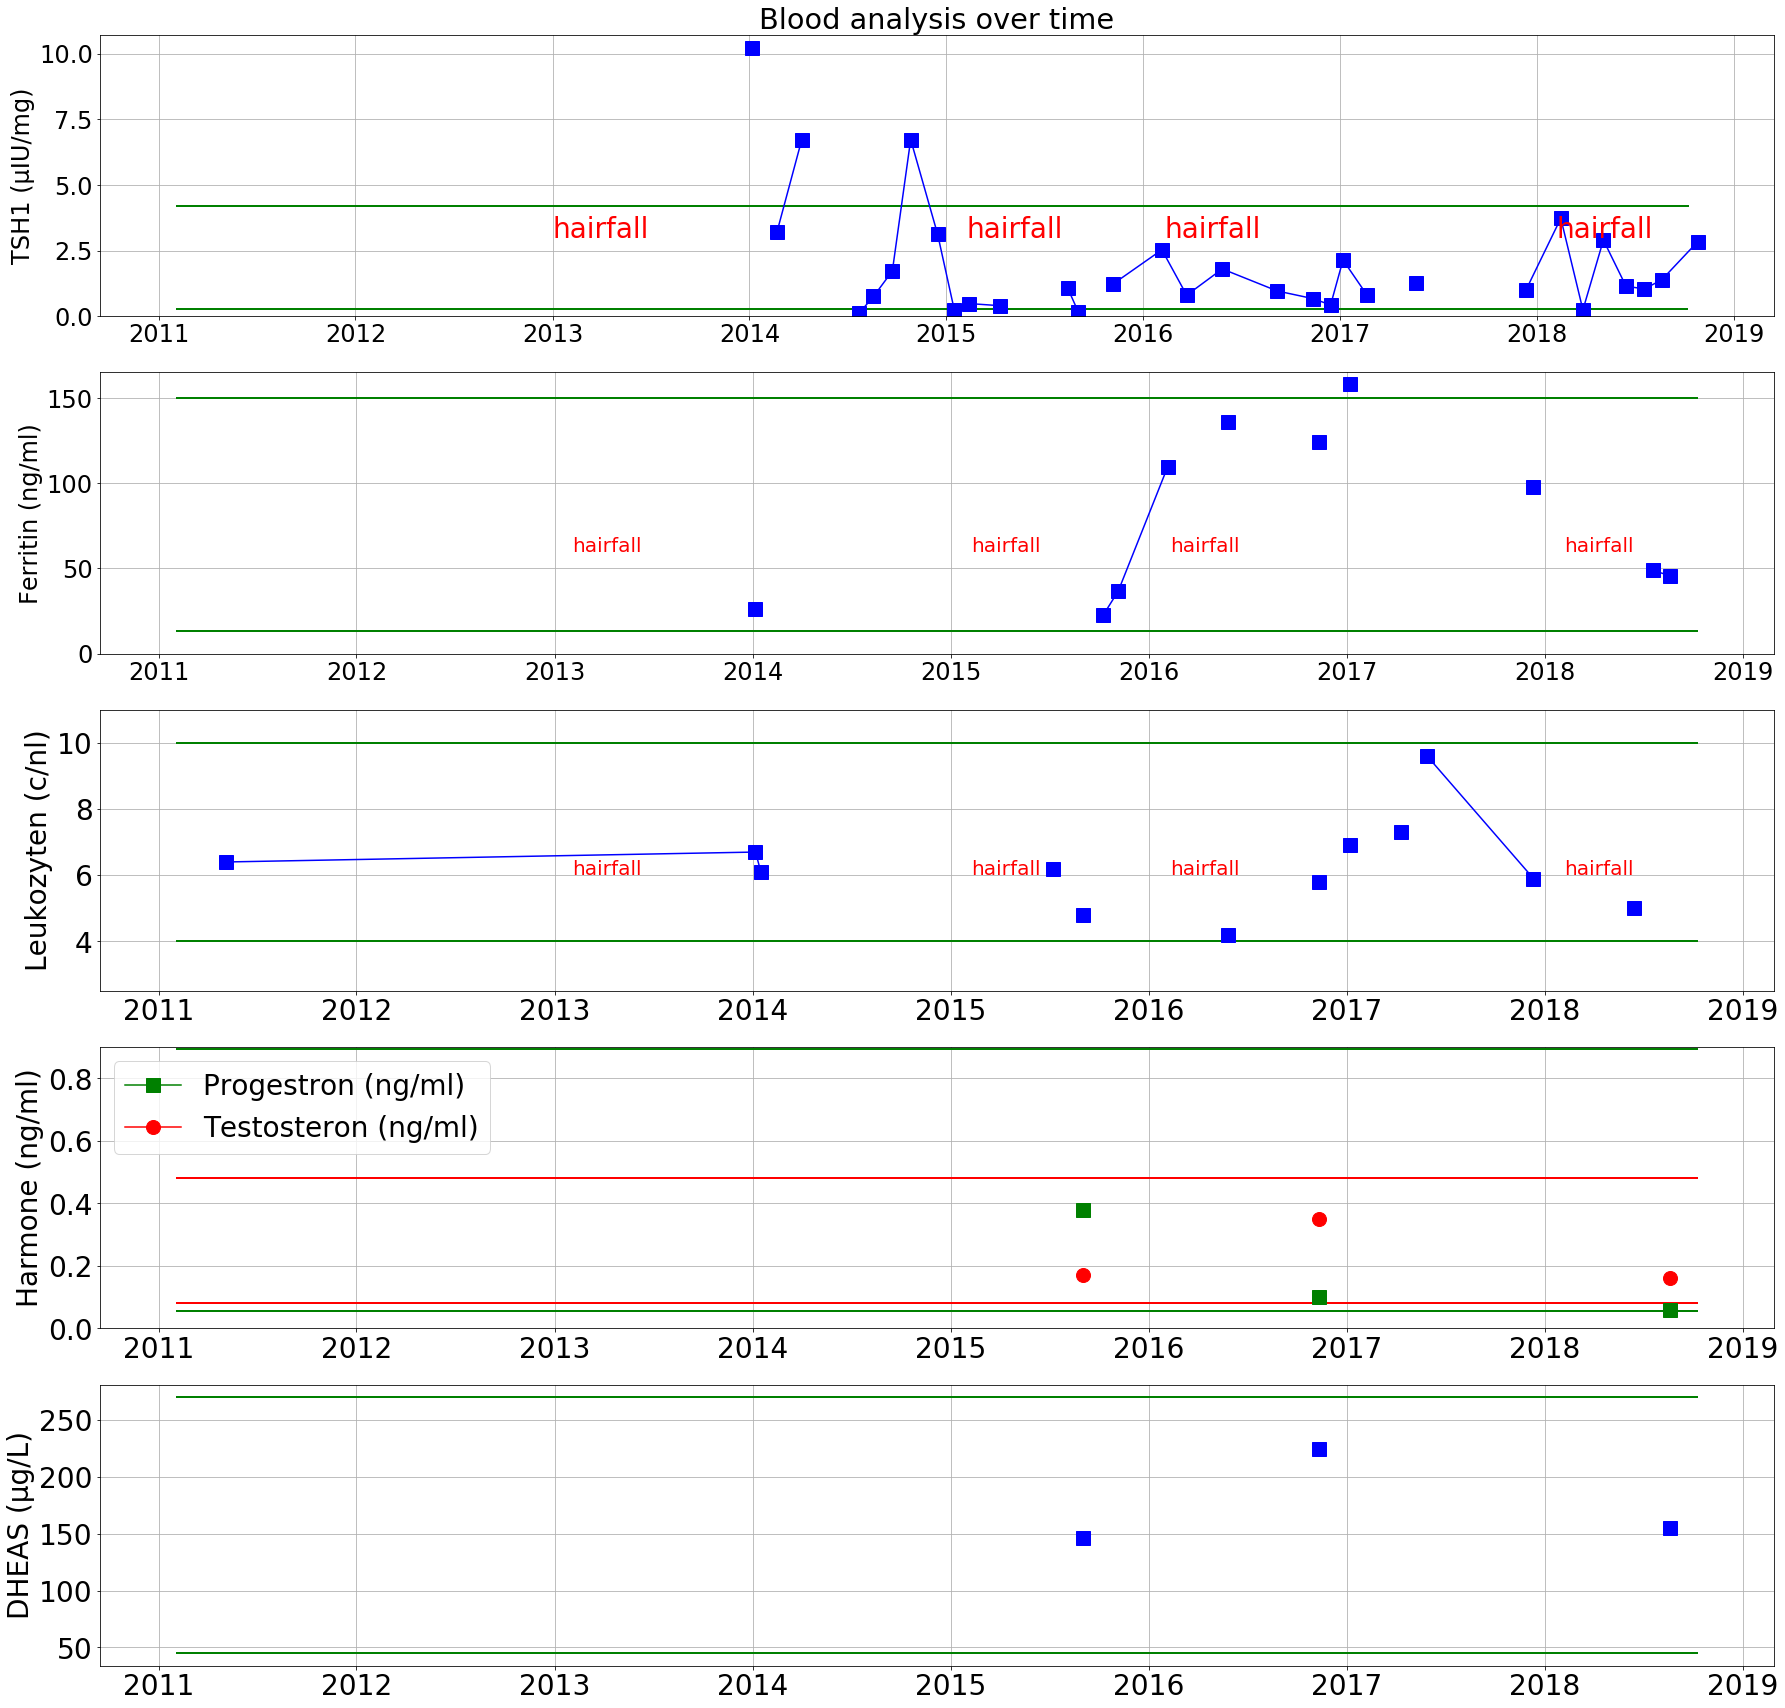

In [18]:
## TSH | Time Series plot
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,30)
plt.rcParams['font.size']=24

fig, ax = plt.subplots()

### Threshold value on Medicine
tshLLimit=0.27
tshHLimit=4.20
fntSize=28

### TSH1
ax = plt.subplot(5, 1, 1)

plt.plot(df['Date'], df['TSH1 (muIU/mg)'], color='b', marker='s', markersize=14)
plt.title('Blood analysis over time')

plt.ylim(0)
plt.ylabel('TSH1 (µIU/mg)')
plt.grid(True)
ax.hlines(y=tshLLimit, xmin="02.02.2011", xmax="10.08.2018",linewidth=2, color='g')
ax.hlines(y=tshHLimit, xmin="02.02.2011", xmax="10.10.2018",linewidth=2, color='g')
plt.text("01.01.2013",3,"hairfall", {'color': 'r', 'fontsize': fntSize})
plt.text("02.7.2015",3,"hairfall", {'color': 'r', 'fontsize': fntSize})
plt.text("02.10.2016",3,"hairfall", {'color': 'r', 'fontsize': fntSize})
plt.text("02.06.2018",3,"hairfall", {'color': 'r', 'fontsize': fntSize})

### Ferritin
ax = plt.subplot(5, 1, 2)
medLowLimit=13.0
medHighLimit=150

plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams['font.size']=28

plt.plot(df['Date'], df['FERR (ng/ml)'], color='blue', marker="s", markersize=14)

#plt.yticks(np.arange(0, 8, step=2))
plt.ylim(0)
plt.ylabel('Ferritin (ng/ml)')
plt.grid(True)
ax.hlines(y=medLowLimit, xmin="02.02.2011", xmax="10.10.2018",linewidth=2, color='g')
ax.hlines(y=medHighLimit, xmin="02.02.2011", xmax="10.10.2018",linewidth=2, color='g')
plt.text("02.02.2013",60,"hairfall", {'color': 'r', 'fontsize': 20})
plt.text("02.7.2015",60,"hairfall", {'color': 'r', 'fontsize': 20})
plt.text("02.10.2016",60,"hairfall", {'color': 'r', 'fontsize': 20})
plt.text("02.06.2018",60,"hairfall", {'color': 'r', 'fontsize': 20})

## Leukozyten
ax = plt.subplot(5, 1, 3)

lekLowLimit=4.0
lekHighLimit=10.0

plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams['font.size']=28

plt.plot(df['Date'], df['Leukozyten (c/nl)'], color='blue', marker="s", markersize=14)
#plt.yticks(np.arange(0, 8, step=2))
plt.ylim(2.5,11)
plt.ylabel('Leukozyten (c/nl)')
plt.grid(True)
#plt.yticks(np.arange(2,12, step=2))
ax.hlines(y=lekLowLimit, xmin="02.02.2011", xmax="10.10.2018",linewidth=2, color='g')
ax.hlines(y=lekHighLimit, xmin="02.02.2011", xmax="10.10.2018",linewidth=2, color='g')
plt.text("02.02.2013",6,"hairfall", {'color': 'r', 'fontsize': 20})
plt.text("02.7.2015",6,"hairfall", {'color': 'r', 'fontsize': 20})
plt.text("02.10.2016",6,"hairfall", {'color': 'r', 'fontsize': 20})
plt.text("02.06.2018",6,"hairfall", {'color': 'r', 'fontsize': 20})

### Harmone
ax=plt.subplot(5,1,4)

plt.plot(df['Date'], df['Progestron (ng/ml)'], color='green', marker="s", markersize=14)
plt.plot(df['Date'], df['Testosteron (ng/ml)'], color='red', marker="o", markersize=14)
#plt.plot(df['Date'], df['LH (mlE/ml)'], color='green', marker="v")

plt.ylim(0)
plt.ylabel('Harmone (ng/ml)')
plt.grid(True)
#plt.yticks(np.arange(2,12, step=2))
#ax.hlines(y=medLowLimit, xmin="02.02.2011", xmax="10.10.2018",linewidth=2, color='r')
#ax.hlines(y=medHighLimit, xmin="02.02.2013", xmax="10.10.2018",linewidth=2, color='r')
#plt.text("02.02.2013",6,"hairfall", {'color': 'r', 'fontsize': 20})
#plt.text("02.7.2015",6,"hairfall", {'color': 'r', 'fontsize': 20})
#plt.text("02.10.2016",6,"hairfall", {'color': 'r', 'fontsize': 20})
#plt.text("02.06.2018",6,"hairfall", {'color': 'r', 'fontsize': 20})
#plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.ylim(0,0.9)
ax.hlines(y=0.08, xmin="02.02.2011", xmax="10.10.2018",linewidth=2, color='r')
ax.hlines(y=0.48, xmin="02.02.2011", xmax="10.10.2018",linewidth=2, color='r')
ax.hlines(y=0.057, xmin="02.02.2011", xmax="10.10.2018",linewidth=2, color='g')
ax.hlines(y=0.893, xmin="02.02.2011", xmax="10.10.2018",linewidth=2, color='g')
#legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

### DHEAH
ax=plt.subplot(5,1,5)

plt.plot(df['Date'], df['DHEAS'], color='blue', marker="s", markersize=14)
#plt.ylim(0)
plt.ylabel('DHEAS (µg/L)')
plt.grid(True)
#plt.yticks(np.arange(2,12, step=2))
#ax.hlines(y=medLowLimit, xmin="02.02.2011", xmax="10.10.2018",linewidth=2, color='r')
#ax.hlines(y=medHighLimit, xmin="02.02.2013", xmax="10.10.2018",linewidth=2, color='r')
#plt.text("02.02.2013",6,"hairfall", {'color': 'r', 'fontsize': 20})
#plt.text("02.7.2015",6,"hairfall", {'color': 'r', 'fontsize': 20})
#plt.text("02.10.2016",6,"hairfall", {'color': 'r', 'fontsize': 20})
#plt.text("02.06.2018",6,"hairfall", {'color': 'r', 'fontsize': 20})
#plt.xticks(rotation='vertical')
#plt.ylim(0,0.9)
ax.hlines(y=45, xmin="02.02.2011", xmax="10.10.2018",linewidth=2, color='g')
ax.hlines(y=270, xmin="02.02.2011", xmax="10.10.2018",linewidth=2, color='g')
plt.show()

fig.savefig("blood-analysis.png")

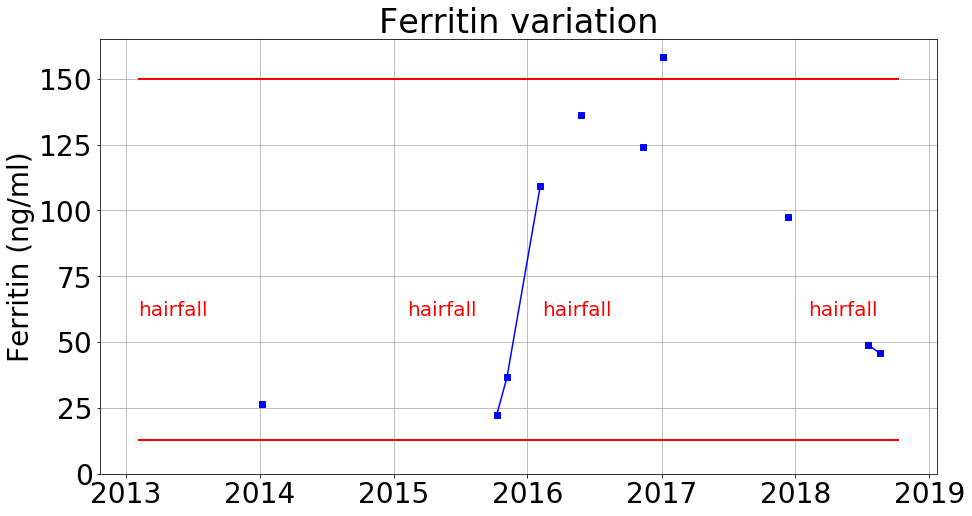

In [38]:
## Ferritin | Time Series plot
import matplotlib 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

medLowLimit=13.0
medHighLimit=150

plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams['font.size']=28

plt.plot(df['Date'], df['FERR (ng/ml)'], color='blue', marker="s")
plt.title('Ferritin variation')

#plt.yticks(np.arange(0, 8, step=2))
plt.ylim(0)
plt.ylabel('Ferritin (ng/ml)')
plt.grid(True)
ax.hlines(y=medLowLimit, xmin="02.02.2013", xmax="10.10.2018",linewidth=2, color='r')
ax.hlines(y=medHighLimit, xmin="02.02.2013", xmax="10.10.2018",linewidth=2, color='r')
plt.text("02.02.2013",60,"hairfall", {'color': 'r', 'fontsize': 20})
plt.text("02.7.2015",60,"hairfall", {'color': 'r', 'fontsize': 20})
plt.text("02.10.2016",60,"hairfall", {'color': 'r', 'fontsize': 20})
plt.text("02.06.2018",60,"hairfall", {'color': 'r', 'fontsize': 20})

plt.show()

fig.savefig("ferritin.png")

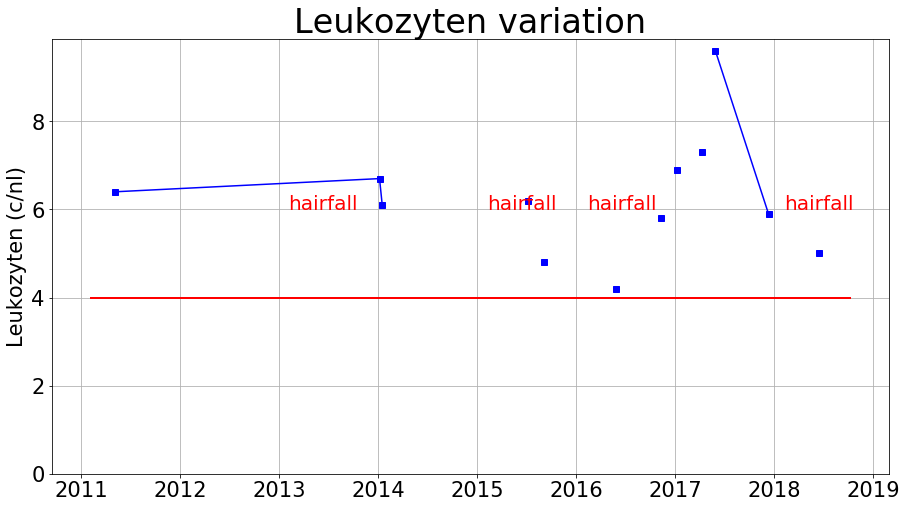

In [76]:
## Ferritin | Time Series plot
import matplotlib 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

medLowLimit=4.0
medHighLimit=10.0

plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams['font.size']=28

plt.plot(df['Date'], df['Leukozyten (c/nl)'], color='blue', marker="s")
plt.title('Leukozyten variation')

#plt.yticks(np.arange(0, 8, step=2))
plt.ylim(0)
plt.ylabel('Leukozyten (c/nl)')
plt.grid(True)
#plt.yticks(np.arange(2,12, step=2))
ax.hlines(y=medLowLimit, xmin="02.02.2011", xmax="10.10.2018",linewidth=2, color='r')
ax.hlines(y=medHighLimit, xmin="02.02.2013", xmax="10.10.2018",linewidth=2, color='r')
plt.text("02.02.2013",6,"hairfall", {'color': 'r', 'fontsize': 20})
plt.text("02.7.2015",6,"hairfall", {'color': 'r', 'fontsize': 20})
plt.text("02.10.2016",6,"hairfall", {'color': 'r', 'fontsize': 20})
plt.text("02.06.2018",6,"hairfall", {'color': 'r', 'fontsize': 20})

plt.show()

fig.savefig("Leukozyten.png")

In [41]:
df.columns

Index(['Date', 'TSH1 (muIU/mg)', 'TSH Stimuliert', 'FERR (ng/ml)',
       'Leukozyten (c/nl)', 'Erythrozyten (c/pl)', 'Hamoglobin (g/dl)',
       'Hamotokrit (Vol%)', 'MCV (fl)', 'MCH (pg)', 'MCHC (g/dl)',
       'Thermbozyten (c/nl)', 'Neutrophile', 'Lymphozyten', 'Monozyten',
       'Eosinophile', 'Basophile', 'C-reactive Protein', '25-Hydroxy-VitD',
       'HbA1C', 'Glucose nuctern', 'FT3 (ng/l)', 'FT4 (ng/dl)',
       'Testosteron (ng/ml)', 'Frier Androgen Index', 'DIHY', 'DHEAS', 'ANDRO',
       'Progestron (ng/ml)', 'FSH (mlE/ml)', 'LH (mlE/ml)',
       'Vitamin-H (ng/dl)', 'Zink (mug/dl)', 'Cholesterol (mg/dl)',
       'Calcium (mmol/l)', 'Hairfall'],
      dtype='object')

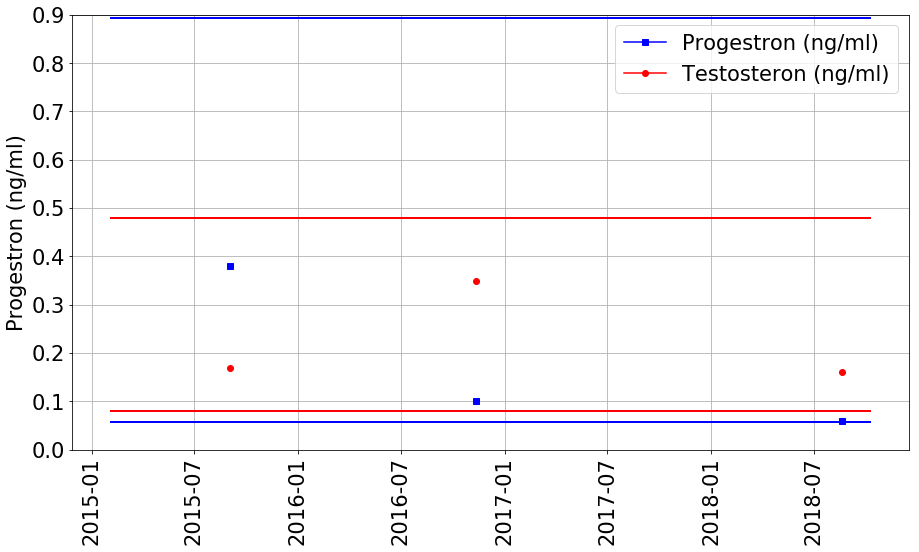

In [75]:
## Ferritin | Time Series plot
import matplotlib 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

medLowLimit=4.0
medHighLimit=10.0

plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams['font.size']=21

plt.plot(df['Date'], df['Progestron (ng/ml)'], color='blue', marker="s")
plt.plot(df['Date'], df['Testosteron (ng/ml)'], color='red', marker="o")
#plt.plot(df['Date'], df['LH (mlE/ml)'], color='green', marker="v")
#plt.plot(df['Date'], df['FT4 (ng/dl)'], color='black', marker="p")



#plt.yticks(np.arange(0, 8, step=2))
plt.ylim(0)
plt.ylabel('Progestron (ng/ml)')
plt.grid(True)
#plt.yticks(np.arange(2,12, step=2))
#ax.hlines(y=medLowLimit, xmin="02.02.2011", xmax="10.10.2018",linewidth=2, color='r')
#ax.hlines(y=medHighLimit, xmin="02.02.2013", xmax="10.10.2018",linewidth=2, color='r')
#plt.text("02.02.2013",6,"hairfall", {'color': 'r', 'fontsize': 20})
#plt.text("02.7.2015",6,"hairfall", {'color': 'r', 'fontsize': 20})
#plt.text("02.10.2016",6,"hairfall", {'color': 'r', 'fontsize': 20})
#plt.text("02.06.2018",6,"hairfall", {'color': 'r', 'fontsize': 20})
plt.xticks(rotation='vertical')
plt.legend()
plt.ylim(0,0.9)
ax.hlines(y=0.08, xmin="02.02.2015", xmax="10.10.2018",linewidth=2, color='r')
ax.hlines(y=0.48, xmin="02.02.2015", xmax="10.10.2018",linewidth=2, color='r')

ax.hlines(y=0.057, xmin="02.02.2015", xmax="10.10.2018",linewidth=2, color='b')
ax.hlines(y=0.893, xmin="02.02.2015", xmax="10.10.2018",linewidth=2, color='b')

    
plt.show()

fig.savefig("Progesteron.png")